In [10]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as apl

In [11]:
#loading the dataset
train = pd.read_csv('/content/train.csv')
print(train.shape)

(891, 12)


In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
#checking for missing data
NAs = pd.concat([train.isnull().sum()], axis=1, keys=['Train'])
NAs[NAs.sum(axis=1) > 0]

,Train
Age,177
Cabin,687
Embarked,2


In [14]:
#filling in the missing age values with mean
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [15]:
#filling in the missing embarked values with the most common value
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [16]:
#filling in the missing cabin values with the most common value
train['Cabin'] = train['Cabin'].fillna(train['Cabin'].mode()[0])

In [18]:
train['Pclass']=train['Pclass'].astype(str)
train['SibSp']=train['SibSp'].astype(str)
train['Parch']=train['Parch'].astype(str)


In [19]:
#getting dummies  for other categorical variables
for col in train.dtypes[train.dtypes == 'object'].index:
    for_dummy = train.pop(col)
    train = pd.concat([train, pd.get_dummies(for_dummy, prefix=col)], axis=1)
train.head()

,PassengerId,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,7.2500,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,38.0,71.2833,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,1,26.0,7.9250,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,35.0,53.1000,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,35.0,8.0500,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [20]:
labels = train.pop('Survived')

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.2)

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8603351955307262

In [26]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8418741808650065

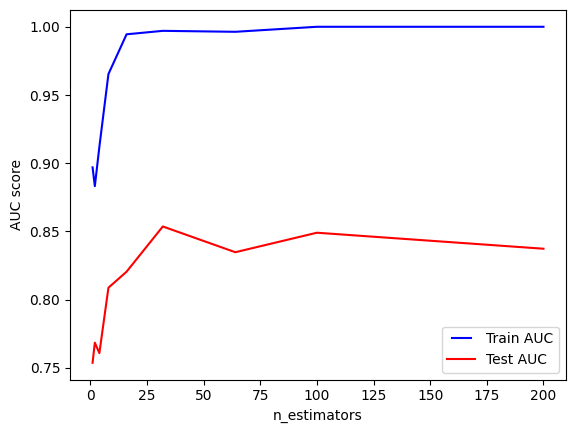

In [28]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []  # Changed to list

for estimator in n_estimators:
    model = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred) # Changed to train_pred
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)  # This line is correct
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)  # Appending to list


from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()


